In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50

# from keras.application.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image  import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
IMAGE_SIZE = [224, 224]
data = tf.keras.utils.image_dataset_from_directory('Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset')

Found 6900 files belonging to 80 classes.


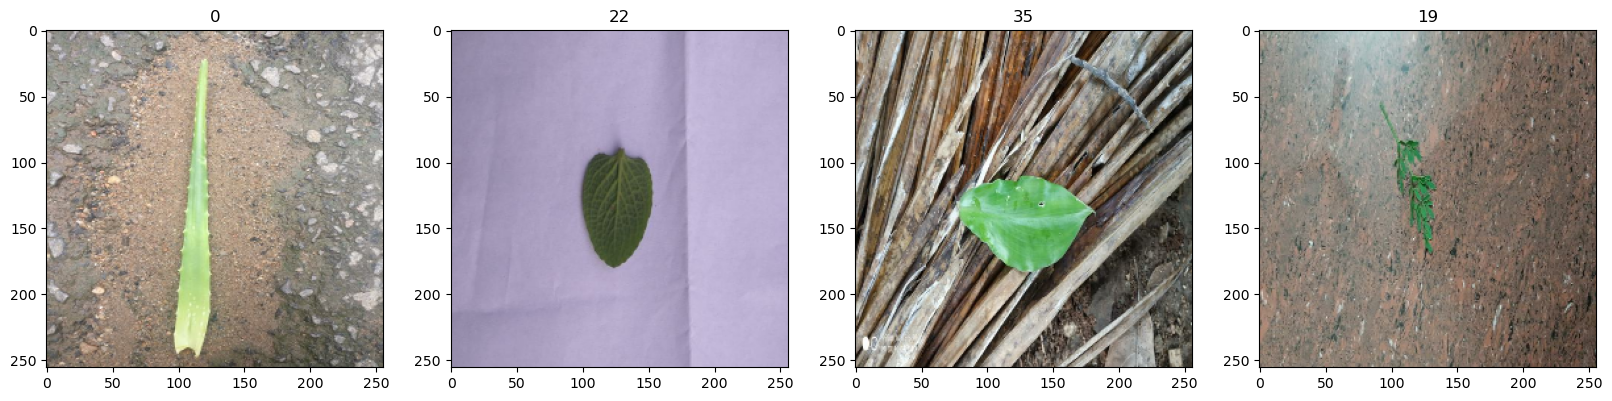

In [7]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [8]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.17777579, 0.23212628, 0.40498692],
          [0.        , 0.04892219, 0.22057483],
          [0.        , 0.1274103 , 0.286387  ],
          ...,
          [0.7071672 , 0.6761534 , 0.55426097],
          [0.708396  , 0.68655217, 0.5818721 ],
          [0.7609222 , 0.74618566, 0.6750613 ]],
 
         [[0.00300149, 0.07894287, 0.24904785],
          [0.05042342, 0.1812835 , 0.3416013 ],
          [0.24137226, 0.44121906, 0.5982044 ],
          ...,
          [0.6921439 , 0.6417456 , 0.5171858 ],
          [0.54976207, 0.5099238 , 0.40237176],
          [0.72792584, 0.70677084, 0.62519866]],
 
         [[0.        , 0.07909294, 0.2421224 ],
          [0.00681918, 0.10220516, 0.26530907],
          [0.27213997, 0.49872854, 0.6641238 ],
          ...,
          [0.7260235 , 0.6471172 , 0.5186921 ],
          [0.5382772 , 0.47693014, 0.3561935 ],
          [0.7339767 , 0.6898459 , 0.5860928 ]],
 
         ...,
 
         [[0.        , 0.01295525, 0.08502939],
          [0.03671

In [19]:
train_size = int( len(data) * 0.7 )

val_size = int(len( data) * 0.2 ) 

test_size = int(len( data) * 0.1)

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [21]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 546s 6us/step


In [25]:
for layer in resnet.layers:
    layer.trainable = False

In [27]:
folder = glob(train)

TypeError: '_TakeDataset' object is not subscriptable